# **Física Computacional**
# Proyecto: Modelación COVID-19 con ecuaciones diferenciales
### Ricardo Covarrubias Yeffal, Santiago Escamilla del Angel, André Sebastián García Ward

In [ ]:
from pylab import *
from IPython.display import Image

## SIR

Ecuaciones diferenciales del modelo SIR

$$\frac{dS}{dt}=-\beta S\frac{I}{N}, \quad \frac{dI}{dt}=\beta S\frac{I}{N} - \gamma I, \quad \frac{dR}{dt}=\gamma I$$

La constante $\frac{1}{\gamma}$ es la duración promedio de la infección, $\beta$ es la probabilidad de que un individuoinfectado contagie a uno suceptible.

Constantes del COVID-19 en días

$$\frac{1}{\gamma} = 10 \quad \rightarrow \quad \gamma = 0.1$$

$$\beta = 0.3$$

La probabilidad de contagio depende de muchos factores extrernos, usaremos este valor de $\beta$ como una primera aproximación, después resolveremos el sistema de ecuaciones para otros valores de $\beta$.




In [ ]:
beta, gamma = 0.3, 0.1

In [ ]:
PN = 128.9 #población México 2020 en millones

def fsir(r,t): # definimos nuestro sistema de ecuaciones dentro de una función
    S = r[0]
    I = r[1]
    R = r[2]

    fS = -beta*S*I/PN
    fI = beta*S*I/PN - gamma*I
    fR = gamma*I

    return array([fS,fI,fR],float)

In [ ]:
# Definimos otra funcion que resuelva numéricamente el sistema de
# Ecuaciones mediante el método de Euler

def SIR_EULER(fsir,r,a,b,N): #r es un arreglo con las condiciones iniciales
  h=(b-a)/N
  lista_t=arange(a,b,h)
  lista_S, lista_I, lista_R = [],[],[]

  for t in lista_t:

    r += h*fsir(r,t)

    error += h

    lista_S.append(r[0])
    lista_I.append(r[1])
    lista_R.append(r[2])

  return lista_S, lista_I, lista_R, lista_t

In [ ]:
# Definimos otra funcion que resuelva numéricamente el sistema de
# Ecuaciones mediante el método de Runge-Kutta de orden 4

def SIR_RK4(fsir,r,a,b,N): #r es un arreglo con las condiciones iniciales

  h=(b-a)/N
  lista_t=arange(a,b,h)
  lista_S, lista_I, lista_R = [],[],[]

  for t in lista_t:

    k1=h*fsir(r,t)
    k2=h*fsir(r+0.5*k1,t+0.5*h)
    k3=h*fsir(r+0.5*k2,t+0.5*h)
    k4=h*fsir(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)

    lista_S.append(r[0])
    lista_I.append(r[1])
    lista_R.append(r[2])

  return lista_S, lista_I, lista_R, lista_t

In [ ]:
#definimos las condiciones iniciales (1 infectado)
rsir = array([128.899999,0.000001,0],float)

# Resolvemos
lista_S, lista_I, lista_R, lista_t = SIR_EULER(fsir,rsir,0,365,1e5)

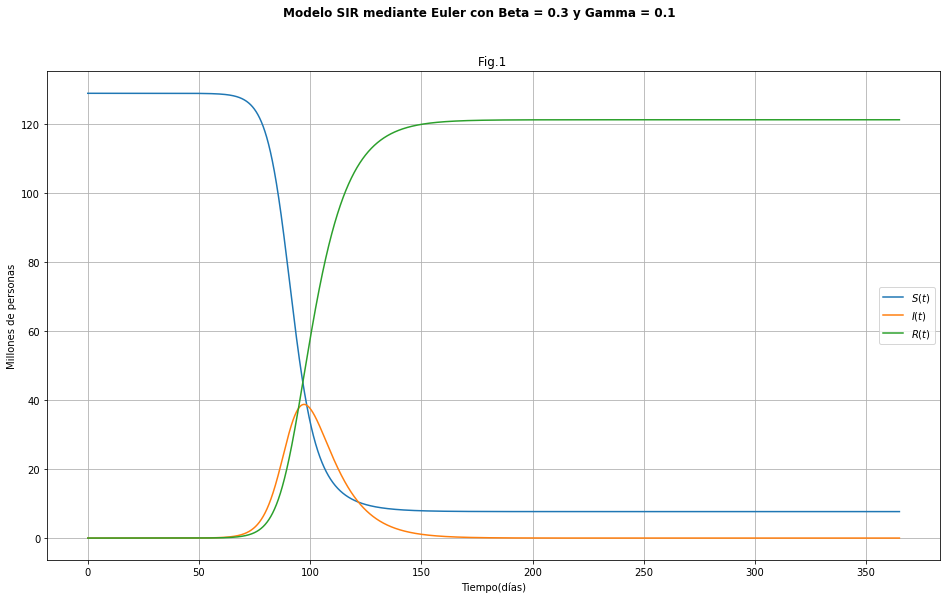

In [ ]:
rcParams["figure.figsize"]= 16,9

plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")

suptitle("Modelo SIR mediante Euler con Beta = 0.3 y Gamma = 0.1", fontweight='bold')
title("Fig.1 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

In [ ]:
#definimos las condiciones iniciales (1 infectado)
rsir = array([128.899999,0.000001,0],float)
# resolvemos
lista_S, lista_I, lista_R, lista_t = SIR_RK4(fsir,rsir,0,365,1e5)

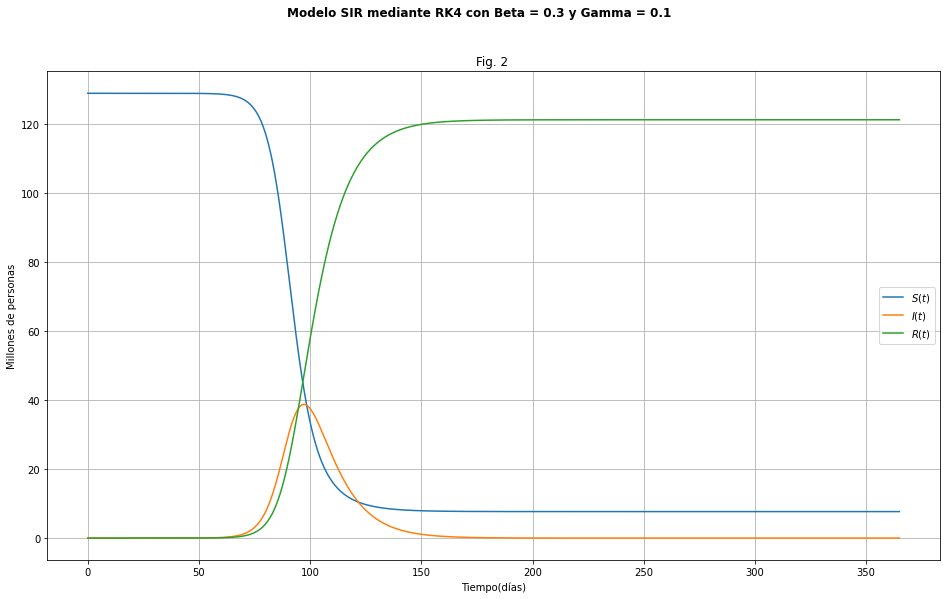

In [ ]:
rcParams["figure.figsize"]= 16,9

plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")

suptitle("Modelo SIR mediante RK4 con Beta = 0.3 y Gamma = 0.1", fontweight='bold')
title("Fig. 2 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

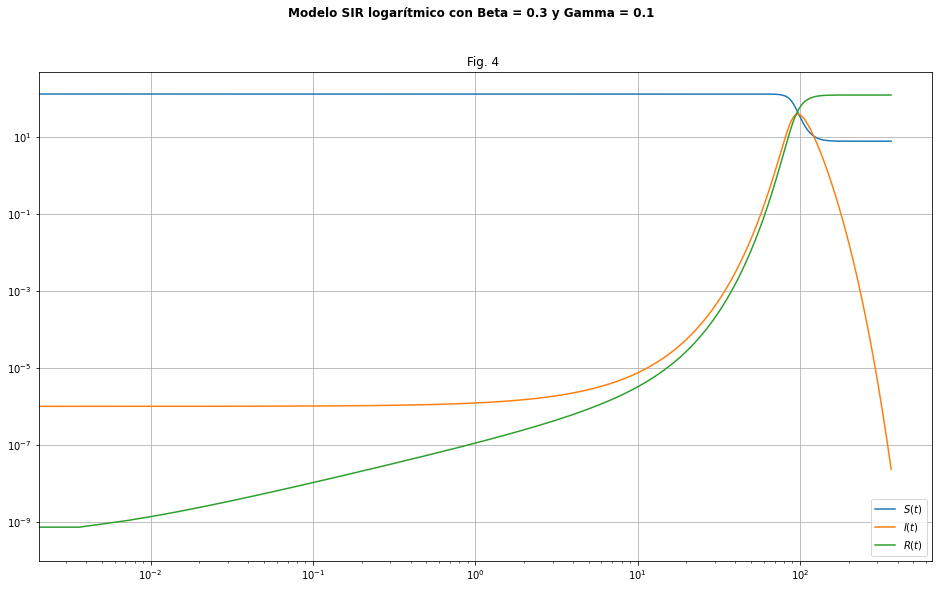

In [ ]:
# graficamos con escala logarítmica
plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")

suptitle("Modelo SIR logarítmico con Beta = 0.3 y Gamma = 0.1", fontweight='bold')
title("Fig. 4 ")
xscale("log")
yscale("log")
grid ()
legend()

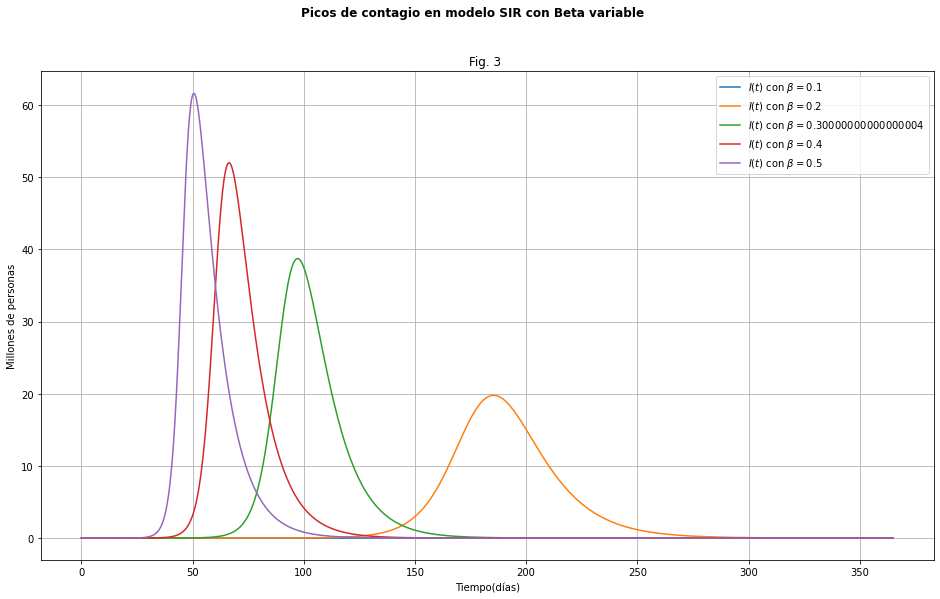

In [ ]:
# Graficamos la curva de infectados para distintos valores de beta
BETAS = linspace(0.1,0.5,5)
for beta in BETAS:
  rsir = array([128.899999,0.000001,0],float)
  lista_S, lista_I, lista_R, lista_t = SIR_RK4(fsir,rsir,0,365,1e5)
  plot(lista_t, lista_I, label = r"$I(t)$ con $\beta=$"+str(beta))
suptitle("Picos de contagio en modelo SIR con Beta variable", fontweight='bold')
title("Fig. 3 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

### Error

El error de truncamiento o error local es $h^2$ para el método de Euler. Cada paso tiene este error. Sin embargo, a lo largo de los pasos, se obtiene un error acumulado o el error global del método numérico.

El error global se obtiene sumando N-1 veces el error local:
$$
\sum_{k=0}^{N-1} \frac{1}{2}h^2\left[\frac{d^2x}{dt^2} \right]_{t=t_k}=
\frac{1}{2}h\sum_{k=0}^{N-1}h\left[\frac{df}{dt} \right]_{t=t_k}\approx
\frac{h}{2}\int_a^b\frac{df}{dt} dt=\frac{h}{2}\left[f(x(b),b)-f(x(a),a)\right]
$$

Entonces, el error global es proporcional a $h$

Calculamos el error global de $S,I,R.$

In [ ]:
# tamaño de nuestro paso
h = 365/1e5

Error_S = abs(h/2*(-beta*lista_S[0]*lista_I[0]/PN-beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN))

Error_I = abs(h/2*(beta*lista_S[0]*lista_I[0]/PN - gamma*lista_I[0] - beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN + gamma*lista_I[int(1e5 - 1)]))

Error_R = abs(h/2*(gamma*lista_I[0]-gamma*lista_I[int(1e5 - 1)]))

print("El error global de S es:", Error_S )
print("El error global de I es:", Error_I )
print("El error global de R es:", Error_R )

El error global de S es: 9.138332567375639e-10
El error global de I es: 7.310677010538412e-10
El error global de R es: 1.8276547400980461e-10


## SEIR

Ecuaciones diferenciales del modelo SEIR

$$\frac{dS}{dt}=-\beta S\frac{I}{N}, \quad \frac{dE}{dt}=\beta S\frac{I}{N} - \epsilon E, \quad \frac{dI}{dt}= \epsilon E -\gamma I, \quad \frac{dR}{dt}=\gamma I$$

La constante $\frac{1}{\gamma}$ es la duración promedio de la infección, $\frac{1}{\epsilon}$ es la duración promedio del periodo de incubación.

Constantes del COVID-19 en días  

$$\frac{1}{\gamma} = 10 \quad \rightarrow \quad \gamma = 0.1$$

$$\frac{1}{\epsilon} = 4\quad \rightarrow \quad \epsilon = 0.25$$






In [ ]:
# definimos las constantes
beta, epsilon, gamma = 0.3 , 0.25, 0.1


In [ ]:
# definimos la función vectorial del sistema de ecuaciones SEIR

NP =128.9 #millones de personas en México

def f(r,t):

    S = r[0]
    E = r[1]
    I = r[2]
    R = r[3]

    fS = -beta*S*I/NP
    fE = beta*S*I/NP - epsilon*E
    fI = epsilon*E - gamma*I
    fR = gamma*I

    return array([fS,fE,fI,fR],float)

In [ ]:
def SEIR_EULER(f,r,a,b,N):
  h=(b-a)/N
  lista_t=arange(a,b,h)
  lista_S, lista_E, lista_I, lista_R = [],[],[],[]

  for t in lista_t:

    r += h*f(r,t)

    lista_S.append(r[0])
    lista_E.append(r[1])
    lista_I.append(r[2])
    lista_R.append(r[3])

  return lista_S, lista_E, lista_I, lista_R, lista_t

In [ ]:
# resolvemos numéricamente el sistema con Runge Kutta 4

def SEIR_RK4(f,r,a,b,N): #r es un arreglo con las condiciones iniciales

  h=(b-a)/N
  lista_t=arange(a,b,h)
  lista_S, lista_E, lista_I, lista_R = [],[],[],[]

  for t in lista_t:

    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)

    lista_S.append(r[0])
    lista_E.append(r[1])
    lista_I.append(r[2])
    lista_R.append(r[3])

  return lista_S, lista_E, lista_I, lista_R, lista_t

In [ ]:

r = array([128.899998,0.000001,0.000001,0.0],float) #definimos las condiciones iniciales en millones

lista_S, lista_E, lista_I, lista_R, lista_t = SEIR_EULER(f,r,0,365,1e5)

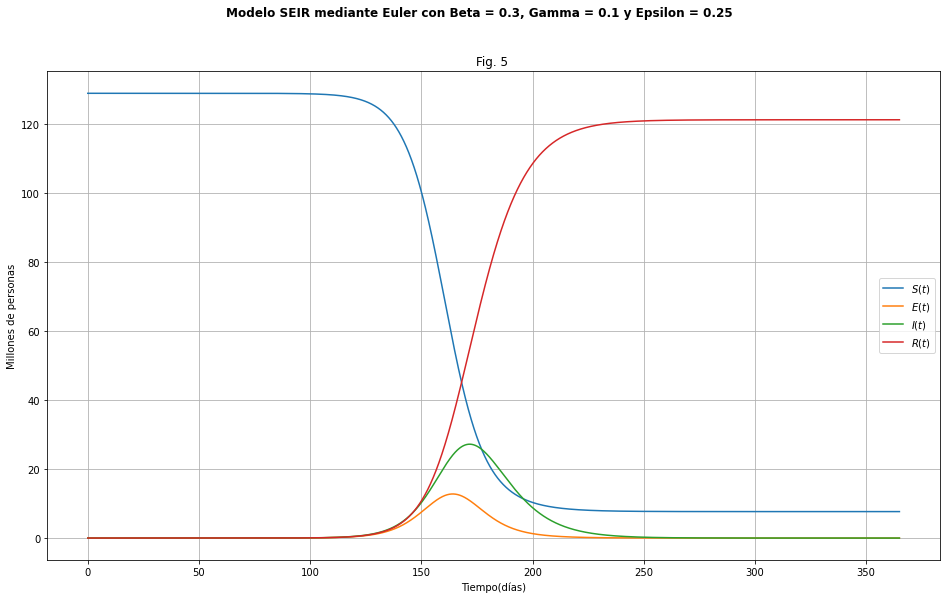

In [ ]:
#Graficamos las funciones SEIR vs t

rcParams["figure.figsize"]= 16,9

plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_E, label = r"$E(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")

suptitle("Modelo SEIR mediante Euler con Beta = 0.3, Gamma = 0.1 y Epsilon = 0.25", fontweight='bold')
title("Fig. 5 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

In [ ]:
r = array([128.899998,0.000001,0.000001,0.0],float) #definimos las condiciones iniciales en millones

lista_S, lista_E, lista_I, lista_R, lista_t = SEIR_RK4(f,r,0,365,1e5)

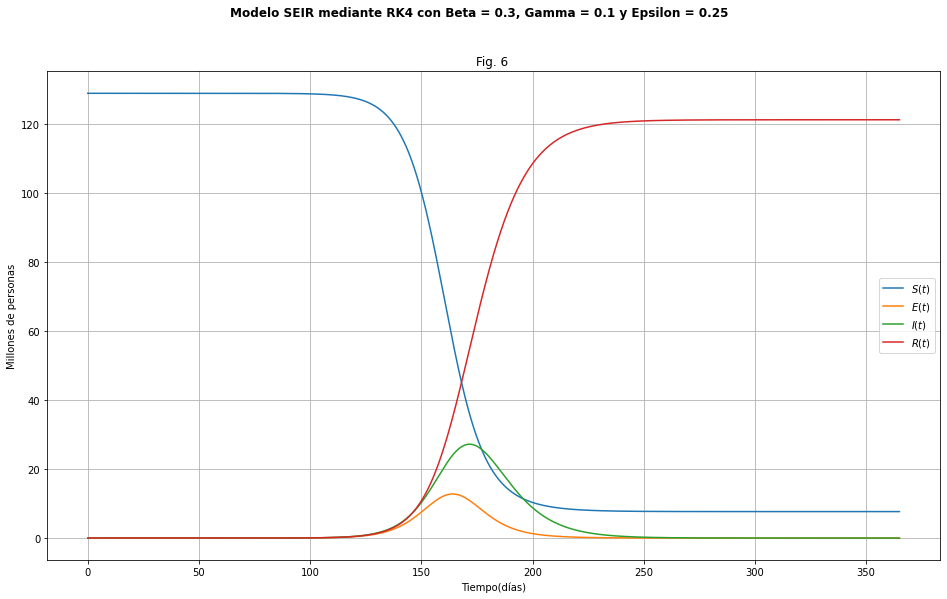

In [ ]:

plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_E, label = r"$E(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")

suptitle("Modelo SEIR mediante RK4 con Beta = 0.3, Gamma = 0.1 y Epsilon = 0.25", fontweight='bold')
title("Fig. 6 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

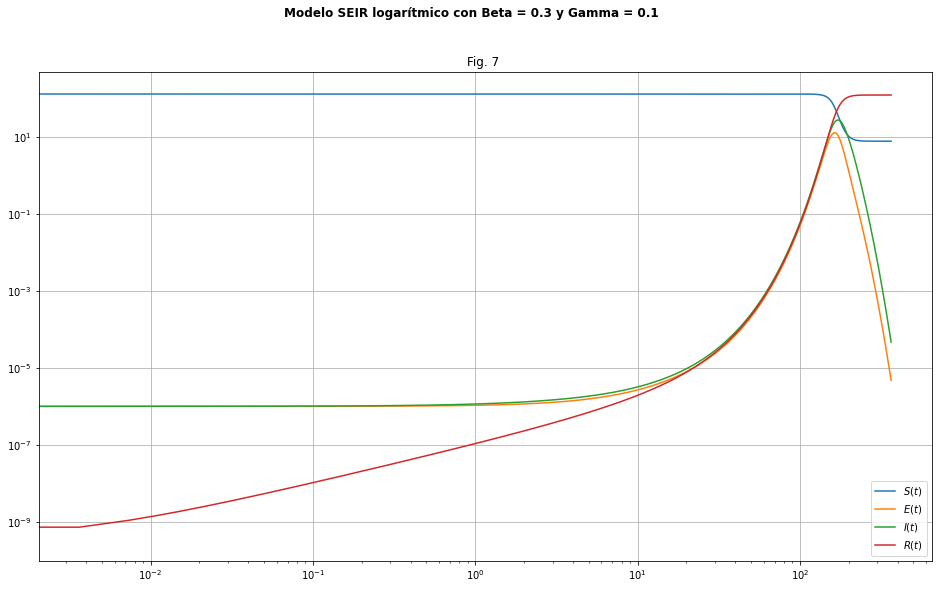

In [ ]:
plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_E, label = r"$E(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")


suptitle("Modelo SEIR logarítmico con Beta = 0.3 y Gamma = 0.1", fontweight='bold')
title("Fig. 7 ")
xscale("log")
yscale("log")
grid ()
legend()

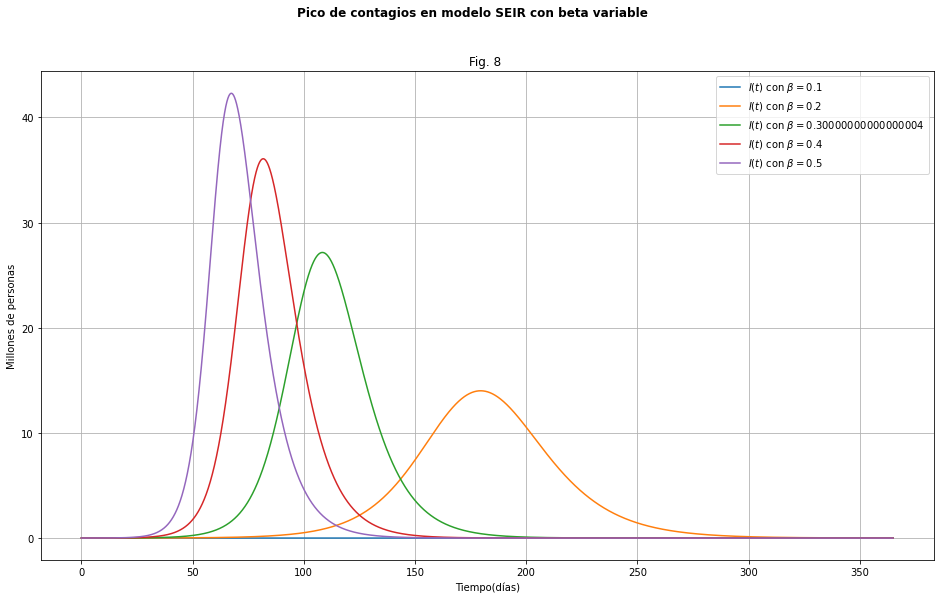

In [ ]:
BETAS = linspace(0.1,0.5,5)
for beta in BETAS:
  r = array([128.798,0.001,0.001,0.0],float)
  lista_S, lista_E, lista_I, lista_R, lista_t = SEIR_RK4(f,r,0,365,1e5)
  plot(lista_t, lista_I, label = r"$I(t)$ con $\beta=$"+str(beta))

suptitle("Pico de contagios en modelo SEIR con beta variable", fontweight='bold')
title("Fig. 8 ")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

In [ ]:
# tamaño de nuestro paso
h = 365/1e5

Error_S = abs(h/2*(-beta*lista_S[0]*lista_I[0]/PN-beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN))

Error_E = abs(h/2*(beta*lista_S[0]*lista_I[0]/PN - epsilon*lista_E[0] - beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN + epsilon*lista_E[int(1e5 - 1)]))

Error_I = abs(h/2*(epsilon*lista_E[0] - gamma*lista_I[0] - epsilon*lista_E[int(1e5 - 1)] + gamma*lista_I[int(1e5 - 1)]))

Error_R = abs(h/2*(gamma*lista_I[0]-gamma*lista_I[int(1e5 - 1)]))

print("El error global de S es:", Error_S )
print("El error global de E es:", Error_E )
print("El error global de I es:", Error_I )
print("El error global de R es:", Error_R )

El error global de S es: 9.122774024270231e-07
El error global de E es: 4.55611694845993e-07
El error global de I es: 2.7406574241133474e-07
El error global de R es: 1.8259996432656734e-07


## SIRD

Ecuaciones diferenciales del modelo SIRD

$$\frac{dS}{dt}=-\beta S\frac{I}{N}, \quad \frac{dI}{dt}=\beta S\frac{I}{N} - \gamma I-\mu I, \quad \frac{dR}{dt}=\gamma I,\quad \frac{dD}{dt}=\mu I$$

La probablidad de fallecer al contraer la enfermedad que es de $p = 0.03$, la enfermedad dura $10$ días aproximadamente así que la probabilidad de fallecer por día es:
$$\mu = 0.003$$

In [ ]:
#definimos las constantes
beta, gamma, mu = 0.3 , 0.1, 0.003

In [ ]:
# definimos la función vectorial del sistema de ecuaciones SEIR

NP =128.9 #millones de personas en México

def f3(r,t):

    S = r[0]
    I = r[1]
    R = r[2]
    D = r[3]

    fS = -beta*S*I/NP
    fI = beta*S*I/NP - gamma*I - mu*I
    fR = gamma*I
    fD = mu*I

    return array([fS,fI,fR,fD],float)

In [ ]:
def SIRD_EULER(f,r,a,b,N):
  h=(b-a)/N
  lista_t=arange(a,b,h)
  lista_S, lista_I, lista_R, lista_D = [],[],[],[]

  for t in lista_t:

    r += h*f(r,t)

    lista_S.append(r[0])
    lista_I.append(r[1])
    lista_R.append(r[2])
    lista_D.append(r[3])

  return lista_S, lista_I, lista_R, lista_D, lista_t

In [ ]:
# resolvemos numéricamente el sistema con Runge Kutta 4

def SIRD_RK4(f,r,a,b,N): #r es un arreglo con las condiciones iniciales

  h=(b-a)/N
  lista_t = arange(a,b,h)
  lista_S, lista_I, lista_R, lista_D = [],[],[],[]

  for t in lista_t:

    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)

    lista_S.append(r[0])
    lista_I.append(r[1])
    lista_R.append(r[2])
    lista_D.append(r[3])

  return lista_S, lista_I, lista_R, lista_D, lista_t

In [ ]:
r = array([128.899999,0.000001,0.0,0.0],float) #definimos las condiciones iniciales en millones

lista_S, lista_I, lista_R, lista_D, lista_t = SIRD_EULER(f3,r,0,365,1e5)

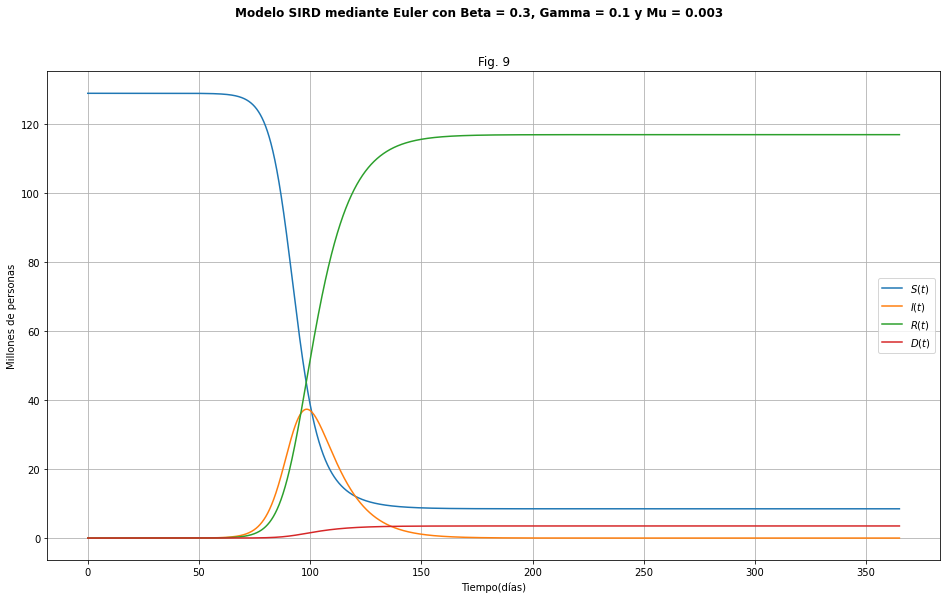

In [ ]:
plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")
plot(lista_t, lista_D, label = r"$D(t)$")

suptitle("Modelo SIRD mediante Euler con Beta = 0.3, Gamma = 0.1 y Mu = 0.003", fontweight='bold')
title("Fig. 9")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

In [ ]:
r = array([128.899999,0.000001,0.0,0.0],float) #definimos las condiciones iniciales en millones

lista_S, lista_I, lista_R, lista_D, lista_t = SIRD_RK4(f3,r,0,365,1e5)

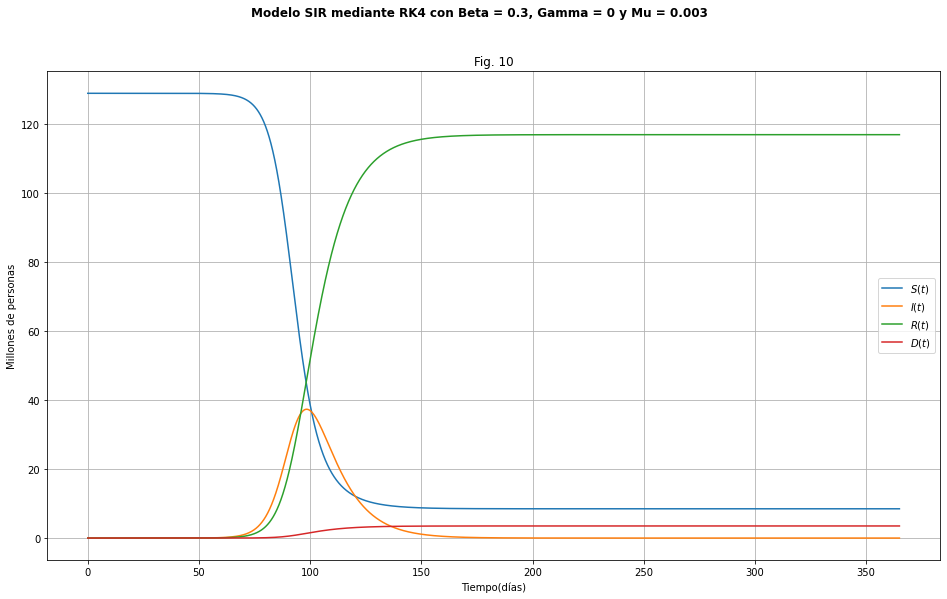

In [ ]:
plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")
plot(lista_t, lista_D, label = r"$D(t)$")

suptitle("Modelo SIR mediante RK4 con Beta = 0.3, Gamma = 0 y Mu = 0.003", fontweight='bold')
title("Fig. 10")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

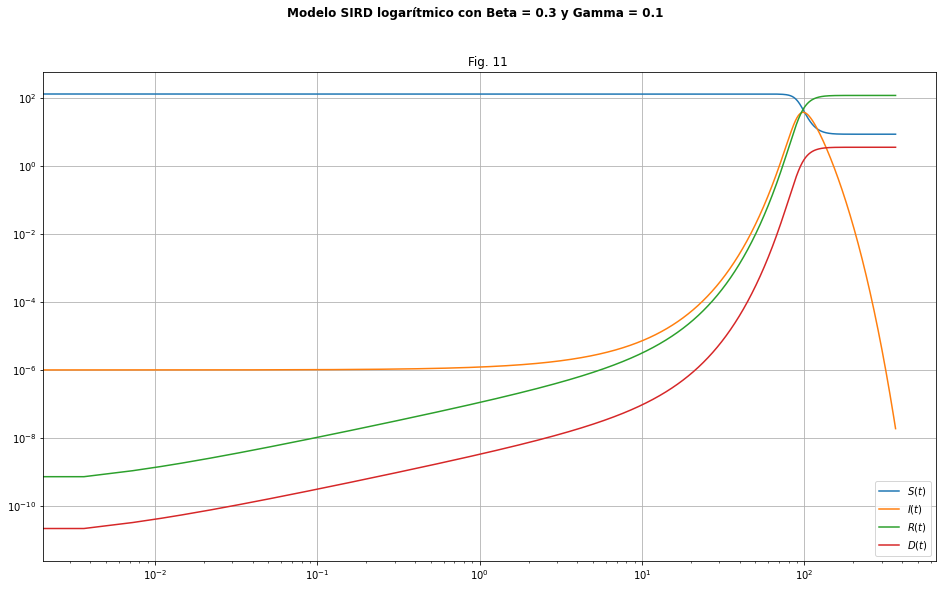

In [ ]:
plot(lista_t, lista_S, label = r"$S(t)$")
plot(lista_t, lista_I, label = r"$I(t)$")
plot(lista_t, lista_R, label = r"$R(t)$")
plot(lista_t, lista_D, label = r"$D(t)$")

suptitle("Modelo SIRD logarítmico con Beta = 0.3 y Gamma = 0.1", fontweight='bold')
title("Fig. 11 ")
xscale("log")
yscale("log")
grid ()
legend()

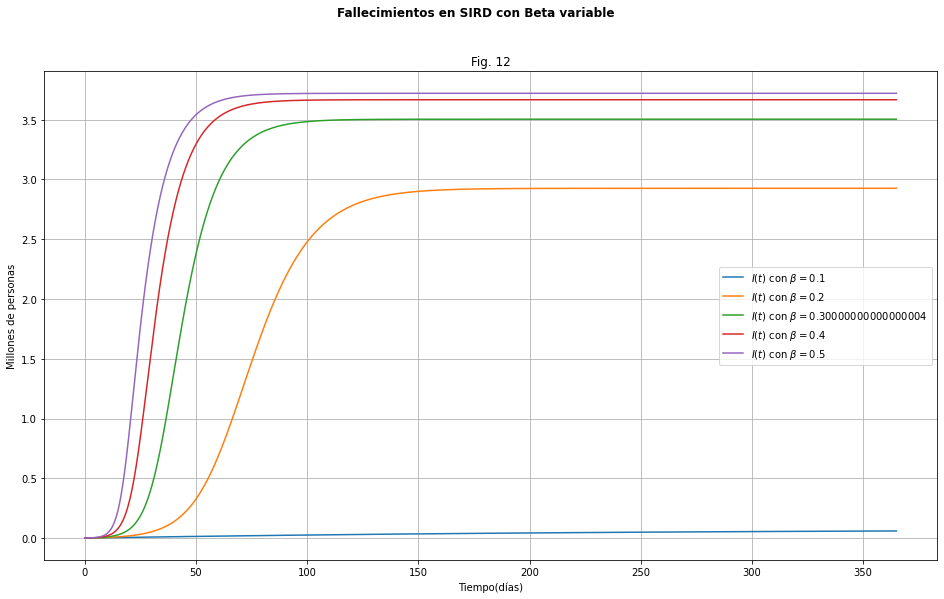

In [ ]:
BETAS = linspace(0.1,0.5,5)
for beta in BETAS:

  r = array([128.7,0.1,0.0,0.0],float) #definimos las condiciones iniciales en millones
  lista_S, lista_I, lista_R, lista_D, lista_t = SEIR_RK4(f3,r,0,365,1e5)
  plot(lista_t, lista_D, label = r"$I(t)$ con $\beta=$"+str(beta))
suptitle("Fallecimientos en SIRD con Beta variable", fontweight='bold')
title("Fig. 12")
ylabel("Millones de personas")
xlabel("Tiempo(días)")
grid ()
legend()

In [ ]:
# tamaño de nuestro paso
h = 365/1e5

Error_S = abs(h/2*(-beta*lista_S[0]*lista_I[0]/PN-beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN))

Error_I = abs(h/2*(beta*lista_S[0]*lista_I[0]/PN - gamma*lista_I[0] - mu*lista_I[0] - beta*lista_S[int(1e5 - 1)]*lista_I[int(1e5 - 1)]/PN + gamma*lista_I[int(1e5 - 1)]+mu*lista_I[int(1e5 - 1)]))

Error_R = abs(h/2*(gamma*lista_I[0]-gamma*lista_I[int(1e5 - 1)]))

Error_D = abs(h/2*(mu*lista_I[0]-mu*lista_I[int(1e5 - 1)]))

print("El error global de S es:", Error_S )
print("El error global de I es:", Error_I )
print("El error global de R es:", Error_R )
print("El error global de D es:", Error_D)

El error global de S es: 9.124014597589176e-05
El error global de I es: 7.241544104341596e-05
El error global de R es: 1.827641255579924e-05
El error global de D es: 5.482923766739772e-07
